# Project 1) Leaf Classifcation

By: Brenden Ziemann<br>
DAT 402

## Problem:
For this project I have choosen to look at a data set of leaves. Based off different attributes and measurements of leaves I will be looking at if it is possible to predict the classifiying types/species of leaves.

Dataset found at https://archive.ics.uci.edu/ml/machine-learning-databases/00288/

Read in the file:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
leaf = pd.read_csv("leaf.csv", header=None)
leaf.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


Column names are still missing. You can find those names in the leaf.zip file. There is a READ.me file for the names of the columns. Adding the column names to the dataset:
1. Class (Species)
2. Specimen Number
3. Eccentricity
4. Aspect Ratio
5. Elongation
6. Solidity
7. Stochastic Convexity
8. Isoperimetric Factor
9. Maximal Indentation Depth
10. Lobedness
11. Average Intensity
12. Average Contrast
13. Smoothness
14. Third moment
15. Uniformity
16. Entropy

In [36]:
leaf.columns = [
     "Class_Species",
     "Specimen_Number",
     "Eccentricity",
     "Aspect_Ratio",
     "Elongation",
     "Solidity",
     "Stochastic_Convexity",
     "Isoperimetric_Factor",
     "Maximal_Indentation_Depth",
     "Lobedness",
     "Average_Intensity",
     "Average_Contrast",
     "Smoothness",
     "Third_moment",
     "Uniformity",
     "Entropy"]
leaf.head(5)

,Class_Species,Specimen_Number,Eccentricity,Aspect_Ratio,Elongation,Solidity,Stochastic_Convexity,Isoperimetric_Factor,Maximal_Indentation_Depth,Lobedness,Average_Intensity,Average_Contrast,Smoothness,Third_moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


## Class/Names of Leaves:

<img src="Types.png" style="width: 450px;"/>

Remove Speciman Number due to the fact we don't need to use that in prediction of the type of leaves:

In [37]:
leaf = leaf.drop("Specimen_Number", axis=1)

### Correlation of Variables to Class_Species

In [38]:
correlation_matrix = leaf.corr()
correlation_matrix["Class_Species"]

Class_Species                1.000000
Eccentricity                 0.091415
Aspect_Ratio                 0.275210
Elongation                   0.141275
Solidity                     0.111843
Stochastic_Convexity         0.046678
Isoperimetric_Factor        -0.049767
Maximal_Indentation_Depth   -0.040026
Lobedness                   -0.017048
Average_Intensity            0.102453
Average_Contrast             0.076246
Smoothness                   0.094885
Third_moment                 0.058520
Uniformity                   0.187717
Entropy                      0.017690
Name: Class_Species, dtype: float64

As you can see the correlation between the different aspects of the leaf and the class/species isn't very high at all. Based of the correlations I decided to drop the columns with  negative correlation.

In [39]:
leaf = leaf.drop("Maximal_Indentation_Depth",axis=1)
leaf = leaf.drop("Isoperimetric_Factor",axis=1)
leaf = leaf.drop("Lobedness",axis=1)

### Histogram of the different Classes/Species

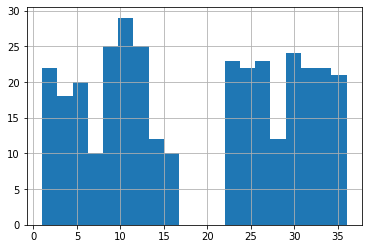

In [40]:
leaf["Class_Species"].hist(bins=20)
plt.show()

There seems to be a variety of species of leaves in the data set but there is a hole of missing data with species of the 17 - 23 classification. 

### Compute the Distance

Now, to find the nearest neighbors. Define distances on the vectors of the independent variables:

Using X to be the values of all observations that isn't Class_Species(compliment) and y to be the values of just Class_Species 

In [41]:
xall = leaf.drop("Class_Species", axis=1)
xall = xall.values
yall = leaf["Class_Species"]
yall = yall.values

X is the independent variables for all measurements that isn't class_species. y is the dependent variables for just being Class_Species

### New Leaf Data Point to be added for Prediction
I will be trying to predict the class/species of a leaf based off these measurements. 
Apply a kNN with k =6 on a new leaf that has the following attributes:<br>
<br>
Eccentricity 0.757867<br>
Aspect_Ratio  1.555678<br>
Elongation       0.374437<br>
Solidity       0.978849<br>
Stochastic_Convexity        0.999998<br>
Average_Intensity       0.024589<br>
Average_Contrast        0.013464<br>
Smoothness       0.068721<br>
Third_moment       0.000576<br>
Uniformity       0.000067<br>
Entropy      0.716522<br>

In [42]:
new_leaf = np.array([
     0.757867,
     1.555678,
     0.374437,
     0.978849,
     0.999998,
     0.024589,
     0.013464,
     0.068721,
     0.000576,
     0.000067,
     0.716522
 ])

Compute the distances between this new leaf and each of the data points in the Leaf Dataset using distance

In [43]:
distances_leaves = np.linalg.norm(xall - new_leaf, axis=1)

With this vector of distances, and now to find out which are the closest neighbors for 6. Find the minimum distances. Sort from lowest to highest and then take the first k elements to obtain the indices of the k nearest neighbors:

In [44]:
k = 6
nearest_neighbors = distances_leaves.argsort()[:k]
nearest_neighbors

array([  1,   7, 139,  37,   3,  91])

Now that the indices of the nearest neighbors have been idetified, now combine those neighbors into a prediction for the new leaf.

First) find the classes/species for the neighbors:

In [45]:
nearest_neighbor_class = yall[nearest_neighbors]
nearest_neighbor_class

array([ 1,  1, 13,  4,  1,  9])

Second) Then the next step is to find the most common class/species that is around the the new leaf. The class/species 1 shows up around the new leaf 3 times which is more than any other species. So the prediction should be that the new leaf is of type 1.

In [46]:
prediction = np.bincount(nearest_neighbor_class).argmax()
prediction

1

Based off the nearest neighbors the most common species/class was 1 so the prediction for the new leaf is of class 1

# Fit kNN in Python Using Example scikit-learn (learning purposes) 
## Would love feedback on process and if it is truly correct/accurate

This is my second part of the project for testing the results using scikit-learn. Using Training data to fit the model and test data to evaluate the model. Make predictions for classifications of the species/types of the leaves of each of the leaves in the test data and compare those results to the known correct class/species.

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
     xall, yall, test_size=0.2, random_state=12345)

#### Creating True Distinction Model
1) Creating a model of the correct distinctions. For the kNN algorithm, choose 6 for the value of k

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=6)

#### Create Unfitted Model with kNN Model
2) Create an unfitted model with knn_model. This model will use the 6 nearest neighbors to predict the value of a future new leaf. To get the data into the model, fit the model on the training dataset:

In [49]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

#### Find Prediction Error on Training Data
Find the prediction error on training data. Use the root-mean-square error (RMSE). Calculated by:

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

8.02472690065309

#### Find Prediction Error on Test Data
Evaluate the performances on data that aren’t included in the model using the test set. Evaluate the predictive performances on the test set:

In [51]:
test_preds = knn_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

9.860630108861747

The RMSE measures the average error of the predicted class/species. With this it is having, on average, an error of 8.0247 which seems very high and I don't feel it works with this example of trying to predict class/species.

### Plotting the Fit of the Model
Observe if the model is the actual fit of your model. Visualize how your predictions have been made:

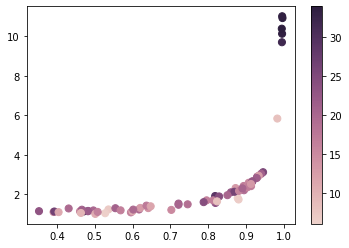

In [52]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

points = ax.scatter(x_test[:, 0], x_test[:, 1], c=test_preds, s=50, cmap=cmap)

f.colorbar(points)
plt.show()

From the graph above each point is a new leaf from the test set. The color of the point reflects the predicted class/species. The X axis refers to the Eccentricity and the Y axis is the Aspect_Ratio of the leaf. It seems high class/species numbers are towards the right. 

To confirm whether this trend exists in actual leaf data, I will do the same for the actual values:

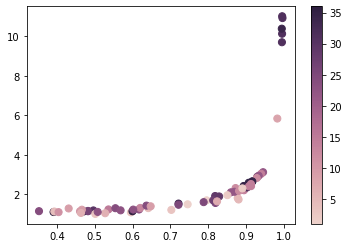

In [53]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Based off the two graphs they look very similar but aren't quite the same for justifying the class/species of a new leaf. 

### Finding the best k Nearest Neighbors to Use

Fit the model with GridSearchCV. GridSearchCV repeatedly fits kNN regressors on a part of the data and tests the performances on the other part of the data. Test values of k to be 1 to 100 for best results. 

Using .best_params_ will show the best number of k to use:

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 100)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [55]:
gridsearch.best_params_

{'n_neighbors': 6}

This shows the best k to use is 6 for nearest neigbors

### Sources:

Abalone Example to better help understand kNN
https://realpython.com/knn-python/